# Проект: Обучение с учителем: качество модели

**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

 **Цель исследования:**

Разработка модели классификации, помогающая персонализировать предложения постоянным клиентам для увеличения покупательной способности



**Ход исследования**

Необходимые для исследования данные я получу из файла `market_file.csv`, `market_money.csv`, `market_time.csv`, `money.csv`. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского и статического анализа. Заключительным этапом послужит разработка линейный моделей МО


Исследование пройдёт в девять этапов:

 - [Загрузка данных](#section1)
 - [Предобработка данных](#section2)
 - [Исследовательский анализ данных](#section3)
 - [Объединение таблиц](#section4)
 - [Корреляционный анализ](#section5)
 - [Использование пайплайнов](#section6)
 - [Анализ важности признаков](#section7)
 - [Сегментация покупателей](#section8)
 - [Общий вывод](#section9)

<a id="section1"></a> 
## Загрузка данных

In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


### Импорт библиотек

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
import math
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from phik import phik_matrix 
import shap



#отключение ограничений вывода графиков по высоте
from IPython.display import display, HTML
display(HTML("<style>.output_wrapper, .output {height:auto !important;}</style>"))

### Загрузка датасета

In [4]:
data_market_file = pd.read_csv('/datasets/market_file.csv', sep=',')
data_market_money = pd.read_csv('/datasets/market_money.csv', sep=',')
data_market_time = pd.read_csv('/datasets/market_time.csv', sep=',')
data_money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

### Обзор датасета

**Датасет market_file.csv**

In [5]:
data_market_file.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


In [6]:
data_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

**Датасет market_money.csv**

In [7]:
data_market_money.head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [8]:
data_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


**Датасет market_time.csv**

In [9]:
data_market_time.head(10)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


In [10]:
data_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


**Датасет money.csv**

In [11]:
data_money.head(10)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


In [12]:
data_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


### Промежуточный вывод

На стандии загрузки и обзора данных, можно сделать следующие заключения:
 - названия столбцов следует привести к нижнему регистру и к типу *snake_case* 
 - пропуски в данных отсутствуют

<a id="section2"></a> 
##  Предобработка данных

### Приведение названий столбцов к нижнему регистру и к типу *snake_case*

In [13]:
data_market_file.columns = data_market_file.columns.str.lower().str.replace(' ', '_')
data_market_time.columns = data_market_time.columns.str.lower().str.replace(' ', '_')
data_market_money.columns = data_market_money.columns.str.lower()
data_money.columns = data_money.columns.str.lower()

Проверка

In [14]:
print(data_market_file.columns)
print(data_market_time.columns)
print(data_market_money.columns)
print(data_money.columns)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')
Index(['id', 'период', 'минут'], dtype='object')
Index(['id', 'период', 'выручка'], dtype='object')
Index(['id', 'прибыль'], dtype='object')


### Обработка дубликатов

Явные дубликаты

In [15]:
print(data_market_file.duplicated().sum())
print(data_market_time.duplicated().sum())
print(data_market_money.duplicated().sum())
print(data_money.duplicated().sum())

0
0
0
0


Неявные дубликаты

In [16]:
market_file_cols = data_market_file.select_dtypes(include=['object'])
market_time_cols = data_market_time.select_dtypes(include=['object'])
market_money_cols = data_market_money.select_dtypes(include=['object'])
money_cols = data_money.select_dtypes(include=['object'])

all_datas = [data_market_file, data_market_time, data_market_money, data_money]

all_cols = [market_file_cols, market_time_cols, market_money_cols, money_cols]

i=0

for cols in all_cols:
    for col in cols:
        print(all_datas[i][col].unique())
    i+=1   
    print('####################################')

['Снизилась' 'Прежний уровень']
['премиум' 'стандартт' 'стандарт']
['да' 'нет']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
####################################
['текущий_месяц' 'предыдцщий_месяц']
####################################
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
####################################
####################################


Имеются дубликаты в колонках **тип_сервиса** датасетов `market_file`, `market_time`

In [17]:
data_market_file['тип_сервиса'].replace('стандартт', 'стандарт', inplace=True)

Исправление опечатки

In [18]:
data_market_time['период'].replace('предыдцщий_месяц','предыдущий_месяц', inplace=True)

data_market_time['период'].head()

0       текущий_месяц
1    предыдущий_месяц
2       текущий_месяц
3    предыдущий_месяц
4       текущий_месяц
Name: период, dtype: object

### Промежуточный вывод

 - все названия столбцов в датасетах  приведены к **нижнему регистру** и типу **snake_case**
 - в датасетax `data_market_file`,  `data_market_time` обнаружен неявный дубликат

<a id="section3"></a> 
## Исследовательский анализ данных

### Описание функций

**Проверка пропущенных значений**

In [19]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if missing_values.empty:
        print("Нет пропущенных значений.")
    else:
        print("Пропущенные значения:")
        print(missing_values)

**Основные метрики**

In [20]:
def describe_data(df):
    display(df.describe())

**Графики для количественных признаков**

In [21]:
def plot_distributions(df, numeric_columns):
    for col in numeric_columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(df[col], kde=True, ax=axes[0])
        axes[0].set_title(f'Распределение {col}')
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f'Боксплот {col}')
        plt.show()

**Графики качественных признаков**

In [22]:
def plot_categorical_distribution(df, categorical_columns):
    for col in categorical_columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Распределение {col}')
        plt.show()

**Проверка на выбросы**

In [23]:
def check_outliers_iqr(df, numeric_columns):
    outliers = {}
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers[col] = outliers_count
    print("Количество выбросов по признакам:")
    print(outliers)

### Анализ market_file

Нет пропущенных значений.


,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


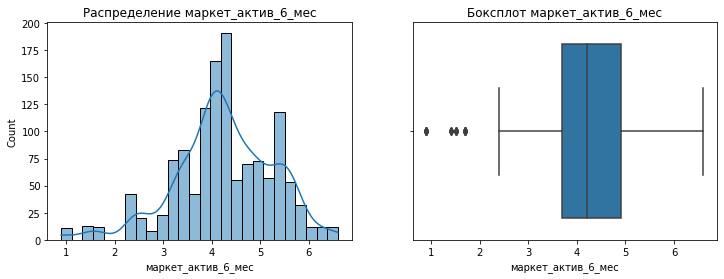

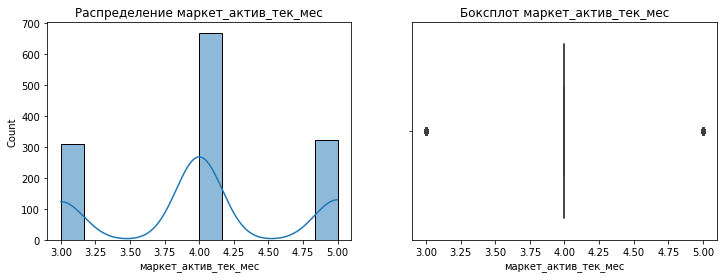

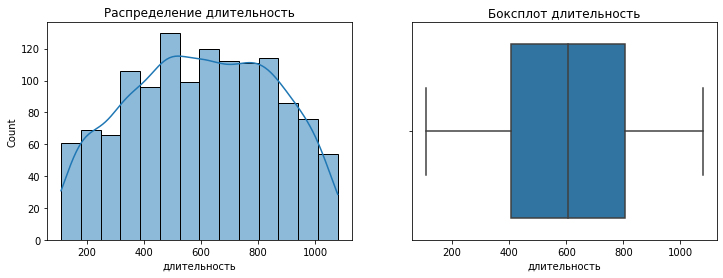

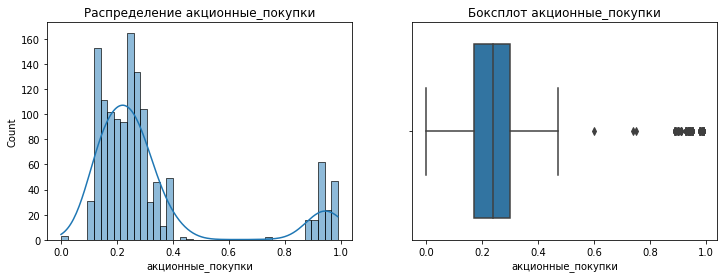

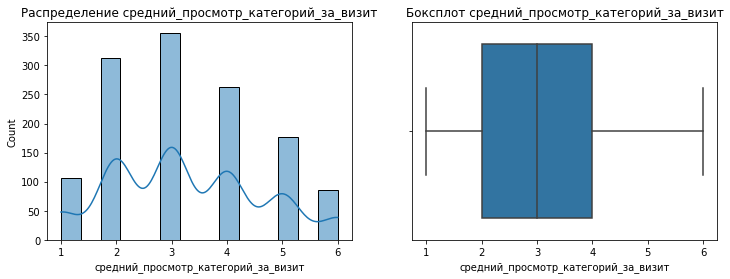

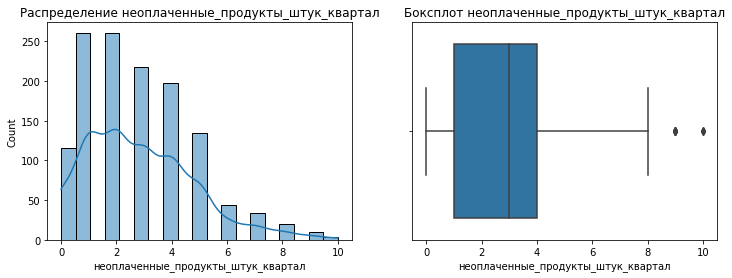

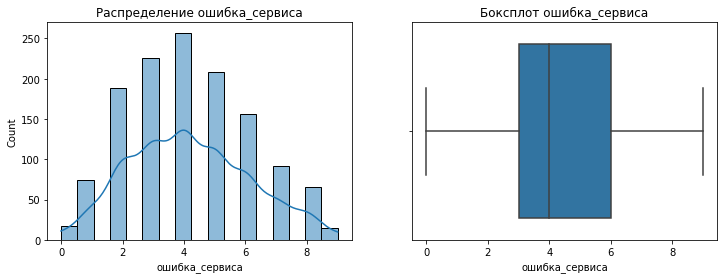

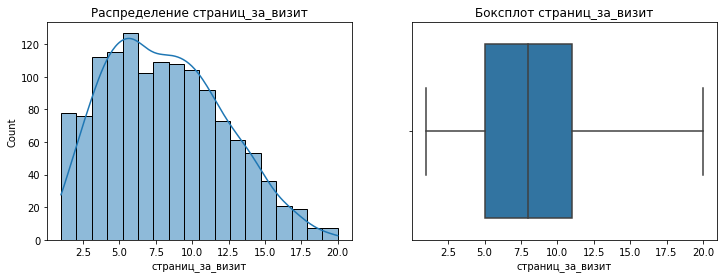

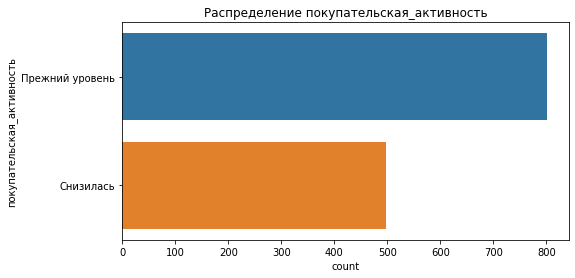

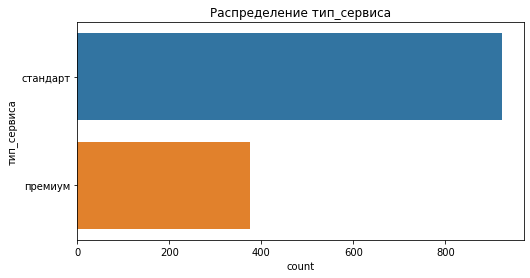

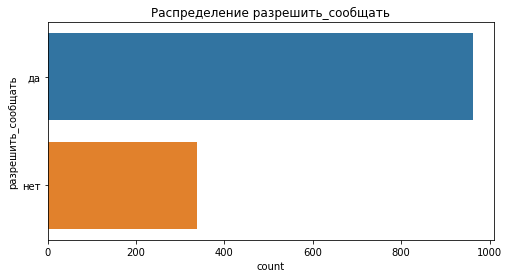

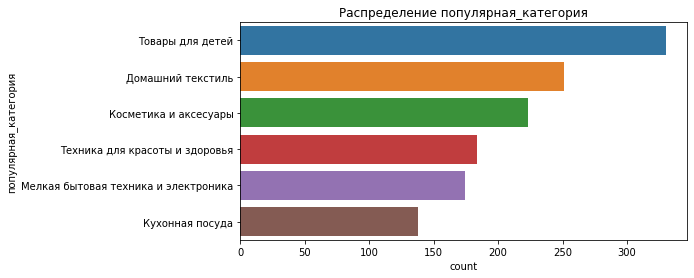

Количество выбросов по признакам:
{'маркет_актив_6_мес': 36, 'маркет_актив_тек_мес': 631, 'длительность': 0, 'акционные_покупки': 168, 'средний_просмотр_категорий_за_визит': 0, 'неоплаченные_продукты_штук_квартал': 14, 'ошибка_сервиса': 0, 'страниц_за_визит': 0}


In [24]:
market_file_cat_cols = data_market_file.select_dtypes(include=['object']).columns.to_list()
market_file_num_cols = data_market_file.drop(columns='id').select_dtypes(exclude=['object']).columns.to_list()

check_missing_values(data_market_file)
describe_data(data_market_file.drop(columns='id'))
plot_distributions(data_market_file, market_file_num_cols)
plot_categorical_distribution(data_market_file, market_file_cat_cols)
check_outliers_iqr(data_market_file, market_file_num_cols)

### Анализ market_time

Нет пропущенных значений.


,минут
count,2600.000000
mean,13.336154
std,4.080198
min,4.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,23.000000


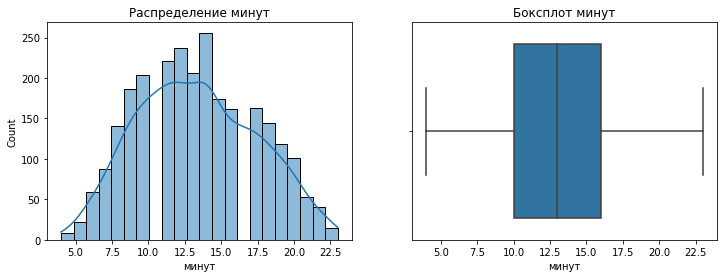

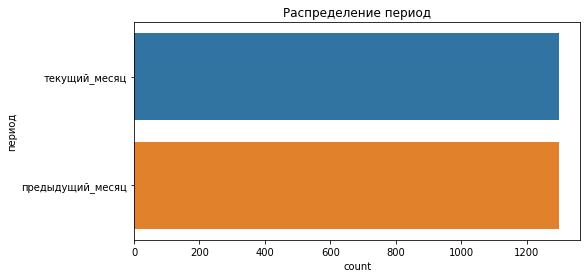

Количество выбросов по признакам:
{'минут': 0}


In [25]:
market_time_cat_cols = data_market_time.select_dtypes(include=['object']).columns.to_list()
market_time_num_cols = data_market_time.drop(columns='id').select_dtypes(exclude=['object']).columns.to_list()

check_missing_values(data_market_time)
describe_data(data_market_time.drop(columns='id'))
plot_distributions(data_market_time, market_time_num_cols)
plot_categorical_distribution(data_market_time, market_time_cat_cols)
check_outliers_iqr(data_market_time, market_time_num_cols)

### Анализ market_money

Нет пропущенных значений.


,выручка
count,3900.000000
mean,5025.696051
std,1777.704104
min,0.000000
25%,4590.150000
50%,4957.500000
75%,5363.000000
max,106862.200000


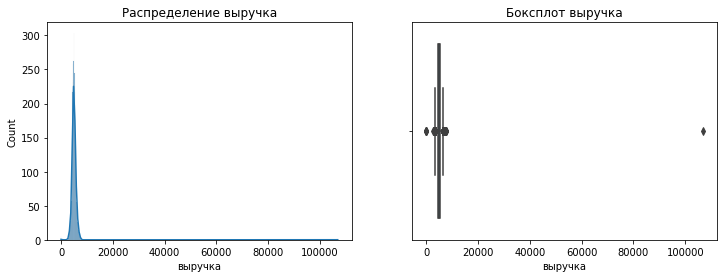

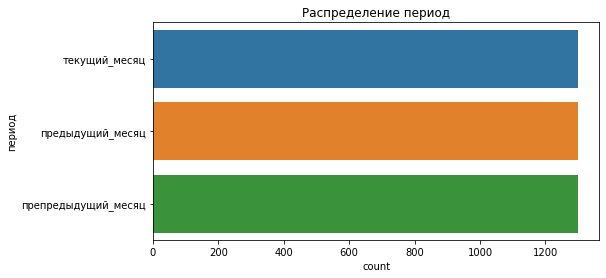

Количество выбросов по признакам:
{'выручка': 175}


In [26]:
market_money_cat_cols = data_market_money.select_dtypes(include=['object']).columns.to_list()
market_money_num_cols = data_market_money.drop(columns='id').select_dtypes(exclude=['object']).columns.to_list()

check_missing_values(data_market_money)
describe_data(data_market_money.drop(columns='id'))
plot_distributions(data_market_money, market_money_num_cols)
plot_categorical_distribution(data_market_money, market_money_cat_cols)
check_outliers_iqr(data_market_money, market_money_num_cols)

### Анализ выброса у покупателя с ID 215380

In [27]:
data_market_money[data_market_money['id'] == 215380]

,id,период,выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,106862.2


In [28]:
data_market_file[data_market_file['id'] == 215380]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7


In [29]:
data_money[data_money['id'] == 215380]

,id,прибыль
32,215380,3.88


Высокое занчение выручки в текущем месяце, но адекватная прибыль - ошибка в данных

### Анализ покупателей с нулевой выручкой

In [30]:
print(data_market_money[data_market_money['выручка'] == 0])

        id               период  выручка
0   215348  препредыдущий_месяц      0.0
2   215348     предыдущий_месяц      0.0
28  215357  препредыдущий_месяц      0.0
29  215357     предыдущий_месяц      0.0
34  215359     предыдущий_месяц      0.0
35  215359  препредыдущий_месяц      0.0


### Анализ money

In [31]:
data_money.drop(columns='id').describe()

,прибыль
count,1300.000000
mean,3.996631
std,1.013722
min,0.860000
25%,3.300000
50%,4.045000
75%,4.670000
max,7.430000


### Промежуточный вывод

В ходе анализа данных были рассмотрены три набора данных: market_file, market_time и market_money, а также отдельный анализ money. Основные выводы:

1. Пропущенные значения

Во всех наборах данных отсутствуют пропущенные значения, что упрощает дальнейшую обработку данных.

2. Анализ количественных признаков

- market_file:
  - Наблюдаются выбросы по нескольким признакам, особенно в "маркет_актив_тек_мес" (631 выбросов) и "акционные_покупки" (168 выбросов).
- market_time:
  - Распределение значений "минут" выглядит относительно нормальным, выбросы отсутствуют.
- market_money:
  - Существенный выброс по показателю "выручка" (175 выбросов).
  - Один из клиентов в текущем месяце показал аномально высокий уровень выручки (106862.2)

3. Выбросы

Наибольшее количество выбросов зафиксировано в "маркет_актив_тек_мес" и "выручка". Это может свидетельствовать о сезонных изменениях в поведении клиентов.


**При объединении таблиц следует удалить пользователей с ID 215348/215357/215359/215380**

<a id="section4"></a> 
## Объединение таблиц

### Преобразование данных

In [32]:
money_periods = ['препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц']
time_periods = ['предыдущий_месяц', 'текущий_месяц']

data_market_money = data_market_money.pivot(index='id', columns='период', values='выручка').reset_index()
data_market_money = data_market_money[['id'] + money_periods] 
data_market_money.columns = ['id', 'выручка_препредыдущий', 'выручка_предыдущий', 'выручка_текущий']

data_market_time = data_market_time.pivot(index='id', columns='период', values='минут').reset_index()

if 'препредыдущий_месяц' not in data_market_time.columns:
    data_market_time['препредыдущий_месяц'] = None

data_market_time = data_market_time[['id', 'препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц']]
data_market_time.columns = ['id', 'минут_препредыдущий', 'минут_предыдущий', 'минут_текущий']

### Объединение

In [33]:
final_data = data_market_file.merge(data_market_money, on='id', how='left')
final_data = final_data.merge(data_market_time, on='id', how='left')
final_data.drop('минут_препредыдущий', inplace=True, axis=1)

print(final_data.info())
final_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий,выручка_предыдущий,выручка_текущий,минут_предыдущий,минут_текущий
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11


**Удаление пользователей с ID 215348/215357/215359/215380**

In [34]:
ids_to_remove = [215348, 215357, 215359, 215380]
final_data = final_data[~final_data['id'].isin(ids_to_remove)].reset_index(drop=True)

### Промежуточный вывод

После объединения таблиц market_file, market_money и market_time получена финальная таблица, содержащая:

- Данные о маркетинговой активности (из market_file).
- Выручку за три периода (из market_money).
- Время, проведенное на сайте, за два периода (из market_time, при этом для "препредыдущего месяца" добавлен столбец с NaN).

<a id="section5"></a> 
## Корреляционный анализ

### Матрица корреляций

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_препредыдущий', 'выручка_предыдущий', 'выручка_текущий', 'минут_предыдущий', 'минут_текущий']


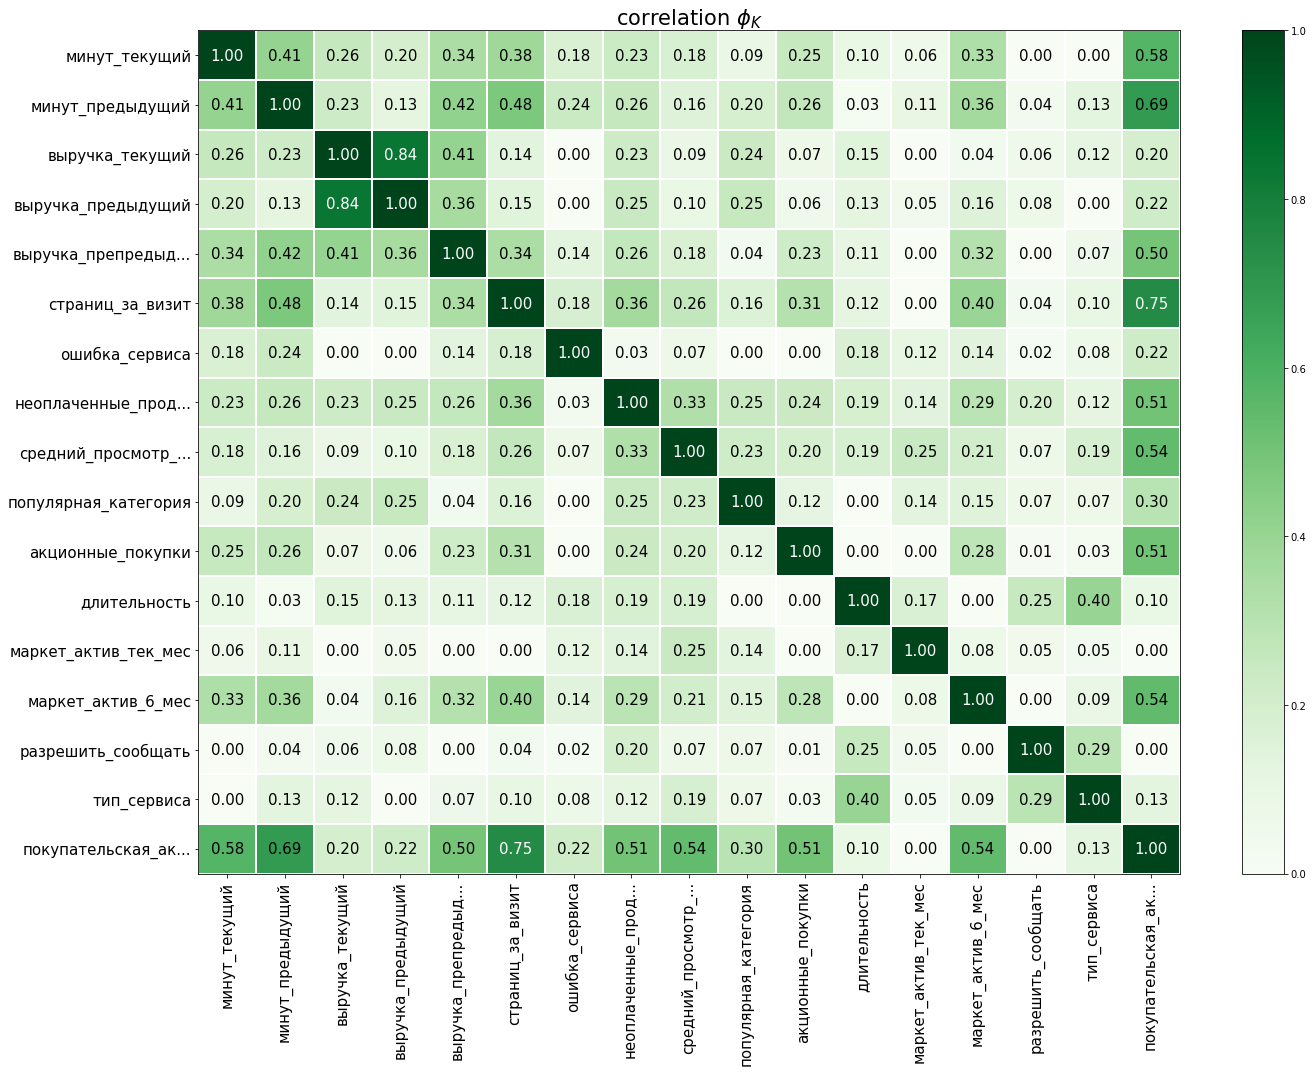

In [35]:
phik_overview = phik_matrix(final_data.drop(columns=['id'])) 


from phik.report import plot_correlation_matrix

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

### Промежуточный вывод 

- Высокая корреляция (более 0.6):

  - покупательская_активность и минут_предыдущий (-0.69) → Обратная зависимость, чем больше времени проводит пользователь, тем ниже его активность.

  - выручка_препредыдущий и выручка_предыдущий (0.84) → Ожидаемо, выручка в разные периоды связана между собой.
  - покупательская_активность и страниц_за_визит (0.75) → Чем больше страниц посещает пользователь, тем выше его активность.

- Средняя корреляция (0.4 - 0.6):

  - минут_текущий и минут_предыдущий (0.41) → Логично, что количество минут, проведенных в разные периоды, связано.
  - минут_предыдущий и покупательская_активность (0.68)

- Отсутствие мультиколлинеарности:

  - Корреляция между большинством признаков ниже 0.8, что говорит об отсутствии сильной мультиколлинеарности. Это означает, что признаки в целом независимы и могут быть использованы в моделировании без исключения.

<a id="section6"></a> 
## Использование пайплайнов

### Подготовка данных

In [36]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    final_data.drop(['id', 'покупательская_активность'], axis=1), 
    final_data['покупательская_активность'], 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE, 
    stratify=final_data['покупательская_активность']
)

cat_features_ohe = ['разрешить_сообщать', 'популярная_категория']
cat_features_ord = ['тип_сервиса']
num_features = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки',
                'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
                'страниц_за_визит', 'выручка_препредыдущий', 'выручка_предыдущий', 'выручка_текущий',
                'минут_предыдущий', 'минут_текущий']

ohe_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='error'))
])

ord_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])


num_pipeline = Pipeline([
    ('scaler', StandardScaler()) 
])

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipeline, cat_features_ohe),
     ('ord', ord_pipeline, cat_features_ord),
     ('num', num_pipeline, num_features)],
    remainder='drop'  
)


pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    {'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
     'models__max_depth': range(2, 5),
     'models__max_features': [2, 3, 'sqrt', 'log2'],
     'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']},

    {'models': [KNeighborsClassifier()],
     'models__n_neighbors': range(2, 5),
     'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']},

    {'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
     'models__C': np.arange(0.1, 2, 0.2),
     'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']},

    {'models': [SVC(random_state=RANDOM_STATE, probability=True, kernel='linear')],
     'models__C': np.arange(0.1, 2, 0.2),
     'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']}
]

### Обучение моделей

In [ ]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    cv=5
)

randomized_search.fit(X_train, y_train)


print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

y_pred = randomized_search.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_pred)}')

Mетрика `ROC_AUC` выбрана по следующим причинам:
 - она отлично подходит для задач бинарной классификации (а у нас именно такая задача)
 - данная метрика отражает насколько обученная модель имеет высокую чувствительность и низкую частоту ложных срабатываний
 - устойчива к дисбалансу классов
 - позволяет сравнивать разные модели между собой, даже если они используют разные алгоритмы или гиперпараметры.

### Промежуточнчый вывод

В рамках данного этапа работы были применены четыре модели классификации: `KNeighborsClassifier`, `DecisionTreeClassifier`, `LogisticRegression` и `SVC`. Для подготовки данных использовался `ColumnTransformer`, который позволил раздельно обработать числовые и категориальные признаки.

Категориальные признаки кодировались с помощью `OneHotEncoder` и `OrdinalEncoder`, а числовые — масштабировались тремя различными методами `MinMaxScaler, StandardScaler`. Такой подход обеспечил гибкость в выборе наилучшего варианта предобработки для каждой модели.

Для поиска оптимальных гиперпараметров был использован `RandomizedSearchCV` с метрикой `ROC-AUC`, что позволило эффективно оценить качество моделей. В результате ***наилучшая метрика ROC-AUC была достигнута с моделью LogisticRegression, которая показала на тестовой выборке значение 0.917***.


<a id="section7"></a> 
## Анализ важности признаков

### Оценка важности признаков для лучшей модели с помощью метода SHAP. 

In [ ]:
best_model = randomized_search.best_estimator_

best_preprocessor = best_model.named_steps['preprocessor']
best_preprocessor.fit(X_train)

ohe_features = best_preprocessor.transformers_[0][1].named_steps['encoder'].get_feature_names(cat_features_ohe)
ord_features = best_preprocessor.transformers_[1][1].named_steps['encoder'].categories_[0]
num_features = num_features

columns = list(ohe_features) + list(ord_features) + list(num_features)

x_Train = best_preprocessor.transform(X_train)
x_Test = best_preprocessor.transform(X_test)

explainer = shap.Explainer(best_model.named_steps['models'], x_Train)
shap_values = explainer(x_Test)
shap_values.feature_names = columns

shap.plots.beeswarm(shap_values)

### Промежуточный вывод

На основании SHAP-диаграммы можно сделать следующие выводы о значимости признаков:
 1. Мало значимые признаки
    - Признаки, расположенные в нижней части графика и имеющие меньший разброс SHAP-значений, оказывают слабое влияние на предсказания модели.
    - Например, признак “популярная_категория_Мелкая бытовая техника и электроника” оказывает минимальное влияние на модель, поскольку его SHAP-значения сосредоточены около нуля.
    - Аналогично, “Sum of 11 other features” свидетельствует о том, что другие признаки, включенные в анализ, также не играют значительной роли.
 2. Наиболее значимые признаки
    - Наибольшее влияние оказывают признаки, расположенные в верхней части графика и имеющие широкий разброс SHAP-значений.
    - “ошибка_сервиса”, “выручка_текущий”, “акционные_покупки” и “минут_предыдущий” – это признаки с высоким влиянием на модель. Их значения существенно изменяют предсказания модели в положительную или отрицательную сторону.
 3. Использование в моделировании и бизнес-решениях
    - Можно исключить малозначимые признаки, чтобы упростить модель без потери качества предсказаний.
    - Высокозначимые признаки важно учитывать при прогнозировании покупательской активности. Например:
    - Если “ошибка_сервиса” сильно снижает покупательскую активность, следует улучшать качество обслуживания.
    - “выручка_текущий” является сильным индикатором активности – можно внедрять стратегии по увеличению среднего чека.


<a id="section8"></a> 
## Сегментация покупателей

### Выполнение сегментацию покупателей

In [ ]:
final_data = final_data.merge(data_money, on='id', how='left')

final_data.head()

Сегментация на основе следующих критериев:

1. Покупательская активность: Снизилась или осталась на прежнем уровне.

2. Прибыльность: Высокая, средняя или низкая.

3. Категория товаров: Товары для детей, домашний текстиль, косметика и аксессуары, техника для красоты и здоровья, кухонная посуда, мелкая бытовая техника и электроника.

In [ ]:
final_data['вероятность_снижения'] = randomized_search.predict_proba(
    final_data.drop(['id', 'покупательская_активность', 'прибыль'], axis=1)
)[:, 1]

print(final_data[['id', 'вероятность_снижения']].head(15))

In [ ]:
seg_1 = final_data[
    (final_data['вероятность_снижения'] >= 0.7) & 
    (final_data['прибыль'] >= 3)
]
merged = final_data[~final_data.index.isin(seg_1.index)]

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=seg_1, x='вероятность_снижения', y='прибыль', label='Исследуемый сегмент', color='blue')
sns.scatterplot(data=merged, x='вероятность_снижения', y='прибыль', label='Другие сегменты', color='purple')
plt.axvline(x=0.7, color='green', linestyle='--', label='Порог вероятности снижения')
plt.axhline(y=3, color='red', linestyle='--', label='Порог прибыльности')
plt.legend()
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Сегментация клиентов по риску и прибыльности')
plt.show()

### Анализ выбранного сегмента

**Выбранный сегмент:** Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.

**Причины выбора:** Эта группа представляет наибольший интерес для бизнеса, так как эти клиенты уже приносят высокую прибыль, но их активность снижается. Удержание таких клиентов может значительно повысить общую прибыль.



**Графическое исследование:**

 - Распределение прибыльности в выбранном сегменте.

 - Распределение времени, проведенного на сайте.

 - Распределение количества просмотренных страниц за визит.

**Сравнение по признаку `акционные_покупки`**

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=seg_1, x='акционные_покупки', color='blue', label='Целевой сегмент', kde=True)
sns.histplot(data=merged, x='акционные_покупки', color='purple', label='Остальные', kde=True, alpha=0.5)
plt.title('Распределение акционных покупок')
plt.legend()
plt.show()

**Сравнение по признаку `ошибка_сервиса`**

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='сегмент', y='ошибка_сервиса', data=pd.concat([
    seg_1.assign(сегмент='Целевой'), 
    merged.assign(сегмент='Остальные')
]))
plt.title('Распределение ошибок сервиса')
plt.show()

**Сравнение по признаку `минут_предудыщий`**

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=seg_1, x='минут_предыдущий', color='blue', label='Целевой', kde=True)
sns.histplot(data=merged, x='минут_предыдущий', color='purple', label='Остальные', kde=True, alpha=0.3)
plt.title('Распределение времени на сайте')
plt.legend()
plt.show()

**Сравнение по признаку `выручка_текущий`**

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=seg_1, x='вероятность_снижения', y='выручка_текущий', color='blue', label='Целевой')
sns.scatterplot(data=merged, x='вероятность_снижения', y='выручка_текущий', color='purple', label='Остальные', alpha=0.3)
plt.axvline(x=0.7, color='green', linestyle='--')
plt.title('Зависимость выручки от вероятности снижения')
plt.legend()
plt.show()

### Предложения по увеличение покупательской способности

1. Распределение акционных покупок

    **Наблюдение:** Клиенты из целевого сегмента (seg_1) имеют более высокую долю акционных покупок по сравнению с остальными.

    **Рекомендация:** Предложите им эксклюзивные акции или ранний доступ к распродажам для удержания.

2. Распределение ошибок сервиса

    **Наблюдение:** В целевом сегменте чаще встречаются ошибки сервиса.

    **Рекомендация:**

       - Улучшите стабильность платформы.

       - Внедрите систему быстрого реагирования на жалобы (например, чат-бот с приоритетной поддержкой).

3. Распределение времени на сайте

    **Наблюдение:** Клиенты из seg_1 проводят на сайте меньше времени.

    **Рекомендация:**

       - Добавьте персонализированные рекомендации на основе их поведения.

       - Введите бонусы за активность (например, за время, проведенное на сайте).

4. Зависимость выручки от вероятности снижения

    **Наблюдение:** Клиенты с высокой выручкой часто попадают в группу риска (вероятность снижения ≥ 0.7).

    **Рекомендация:**

       - Назначьте персональных менеджеров для VIP-клиентов.

       - Проводите регулярные опросы для выявления их потребностей.

<a id="section9"></a> 
## Общий вывод

### Описание задачи

**Целью проекта** было разработать модель классификации, которая поможет персонализировать предложения для постоянных клиентов интернет-магазина «В один клик» с целью увеличения их покупательской активности. Задача заключалась в анализе данных о поведении клиентов, их покупательской активности, выручке и других метриках, чтобы выявить ключевые факторы, влияющие на активность клиентов, и предложить меры для её повышения.

### Исходные данные и предобработка

**Исходные данные были представлены в четырёх таблицах:**

 - `market_file.csv` — данные о покупательской активности, типе сервиса, маркетинговой активности, популярных категориях товаров и других метриках.

 - `market_money.cs` — данные о выручке за три периода (препредыдущий, предыдущий и текущий месяцы).

 - `market_time.csv` — данные о времени, проведённом на сайте за два периода (предыдущий и текущий месяцы).

 - `money.csv` — данные о прибыли клиентов.

**На этапе предобработки данных были выполнены следующие шаги:**

 - Приведение названий столбцов к нижнему регистру и формату `snake_case`.

 - Исправление опечаток в категориальных данных (например, "стандартт" на "стандарт").

 - Преобразование типа данных для столбца "прибыль" в таблице money.csv.

 - Объединение таблиц по идентификатору клиента (id).

 - Проверка на дубликаты и пропущенные значения (дубликаты отсутствовали, пропуски также не были обнаружены).

### Поиск лучшей модели

**Разделение данных:** Данные были разделены на обучающую и тестовую выборки с использованием стратификации по целевой переменной (покупательская активность).

**Предобработка данных:** Для обработки категориальных и числовых признаков был создан пайплайн, включающий:

 - OneHotEncoder для категориальных признаков.

 - OrdinalEncoder для порядковых признаков.

 - StandardScaler для масштабирования числовых признаков.

**Обучение моделей:** Были протестированы четыре модели:

 - DecisionTreeClassifier

 - KNeighborsClassifier

 - LogisticRegression

 - SVC

**Оптимизация гиперпараметров:** Для поиска оптимальных параметров моделей использовался `RandomizedSearchCV` с метрикой `ROC-AUC`.

**Оценка качества моделей:** Лучшая модель была выбрана на основе метрики `ROC-AUC` на тестовой выборке.

### Лучшая модель

Лучшей моделью оказалась `LogisticRegression` с параметрами:

 - C = 0.1

 - penalty = 'l1'

 - solver = 'liblinear'

Метрика `ROC-AUС` на тестовой выборке составила **0.917**, что свидетельствует о высоком качестве модели.

### Выводы и предложения для выбранного сегмента покупателей

**Наиболее значимые признаки:**

 - "ошибка_сервиса" — негативно влияет на покупательскую активность.

 - "выручка_текущий" — сильный индикатор активности клиентов.

 - "средний_просмотр_категорий_за_визит" — указывает на заинтересованность клиентов.

 - "минут_предыдущий" — время, проведённое на сайте, коррелирует с активностью.

**Сегментация покупателей:**

*Выбранный сегмент* — клиенты с высокой прибыльностью, но снижающейся активностью. Это ключевая группа для удержания, так как они уже приносят значительную прибыль, но их активность снижается.

**Предложения для увеличения покупательской активности:**

 - Персонализированные предложения: Предлагать скидки и акции на популярные категории товаров (например, товары для детей, косметика и аксессуары).

 - Улучшение пользовательского опыта: Упростить навигацию по сайту и процесс оформления заказа.

 - Программы лояльности: Внедрить бонусные программы для постоянных клиентов.

 - Улучшение качества обслуживания: Уменьшить количество ошибок сервиса и улучшить поддержку клиентов.